In [3]:
import psycopg2
import pandas as pd
import config
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np

color_palette = sns.color_palette(palette='muted', n_colors=None, desat=.75)
sns.set(context='notebook', palette=color_palette, style='whitegrid', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)

%matplotlib inline

directory = "url_top_lists/"
stream = "filtered"

In [13]:
conn = None
try:
    # read connection parameters
    params = config.cfgAzureF17()
    
    paramsS03 = config.cfgAzureF03()

    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    connS17 = psycopg2.connect(**params)
    
    connS03 = psycopg2.connect(**paramsS03)

    # create a cursor
    curS17 = connS17.cursor()
    curS03 = connS03.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    curS17.execute('SELECT version()')
    curS03.execute('SELECT version()')
    # display the PostgreSQL database server version
    db_version_curS17 = curS17.fetchone()
    db_version_curS03 = curS03.fetchone()
    print(db_version_curS17)
    print(db_version_curS03)

    # close the communication with the PostgreSQL
    curS17.close()
    curS03.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)


In [5]:
#tweets03 = pd.read_sql_query("SELECT * FROM tweets_info;", conn, parse_dates=['created_at'] )
#tweets03['created_at'] = tweets['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")
tweets03 = pd.read_sql_query("SELECT * FROM tweets_urls;", connS03 )

print("Number of Tweets: %s" %len(tweets03))
tweets03.head()

Number of Tweets: 2411523


,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
0,954945594463793153,http://bit.ly/2mWdorg,https://de.thenatureworld.net/rezepte/pulled-b...,200.0,https://de.thenatureworld.net/,thenatureworld.net,False,False,True,False
1,954945607508086785,http://tinyurl.com/y7gpuaon,http://www.seismoblog.de/2018/01/21/starkes-er...,200.0,http://www.seismoblog.de/,seismoblog.de,False,False,True,False
2,954945607495495681,https://twitter.com/TheStalkerCutie/status/954...,https://twitter.com/TheStalkerCutie/status/954...,200.0,https://twitter.com/,twitter.com,True,False,True,False
3,954945616051916800,https://malteklein.de/produkt/big-elephant-4-t...,https://malteklein.de/produkt/big-elephant-4-t...,200.0,https://malteklein.de/,malteklein.de,False,False,True,False
4,953134480277073921,http://michisoldtimer.com/2018/01/16/nuerburgr...,https://michisoldtimer.com/2018/01/16/nuerburg...,200.0,https://michisoldtimer.com/,michisoldtimer.com,False,False,True,False


In [6]:
#tweets03 = pd.read_sql_query("SELECT * FROM tweets_info;", conn, parse_dates=['created_at'] )
#tweets03['created_at'] = tweets['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")
tweets17 = pd.read_sql_query("SELECT * FROM tweets_urls;", connS17 )

print("Number of Tweets: %s" %len(tweets17))
tweets17.head()

Number of Tweets: 2107279


,tweet_id,short_url,resolved_url,response_code,domain,top_level_domain,is_twitter_url,is_media,is_processed,failed
0,988681561255104513,http://www.deutschlandfunkkultur.de/erneuerung...,http://www.deutschlandfunkkultur.de/erneuerung...,200.0,http://www.deutschlandfunkkultur.de/,deutschlandfunkkultur.de,False,False,True,False
1,988681561620013056,https://goo.gl/fb/VQk6pz,http://feeds.feedburner.com/~r/Wwwchieftaincom...,404.0,http://feeds.feedburner.com/,feedburner.com,False,False,True,False
2,988681561620013056,http://bitly.com/2sjBBbW,https://www.amazon.de/gp/goldbox/ref=nav_cs_gb...,405.0,https://www.amazon.de/,amazon.de,False,False,True,False
3,988681562505072640,http://bit.ly/2HVTLsN,http://www.themanwiththehat.de/eng/memes/view/...,200.0,http://www.themanwiththehat.de/,themanwiththehat.de,False,False,True,False
4,988681562769252352,https://ift.tt/2qWJynx,https://www.google.com/url?rct=j&sa=t&url=http...,200.0,https://www.google.com/,google.com,False,False,True,False


https://twitter.com/account/suspended                                                                                                                                                                 8470
https://www.youtube.com/watch?v=Dw-2hh6G_D8&feature=youtu.be&a                                                                                                                                        6623
https://www.dwd.de/                                                                                                                                                                                   6571
https://pi2.17bullets.com/tw_post.php?messageId=achievement&values=&locale=en_US                                                                                                                      5323
http://www.messe.tv/                                                                                                                                                                        

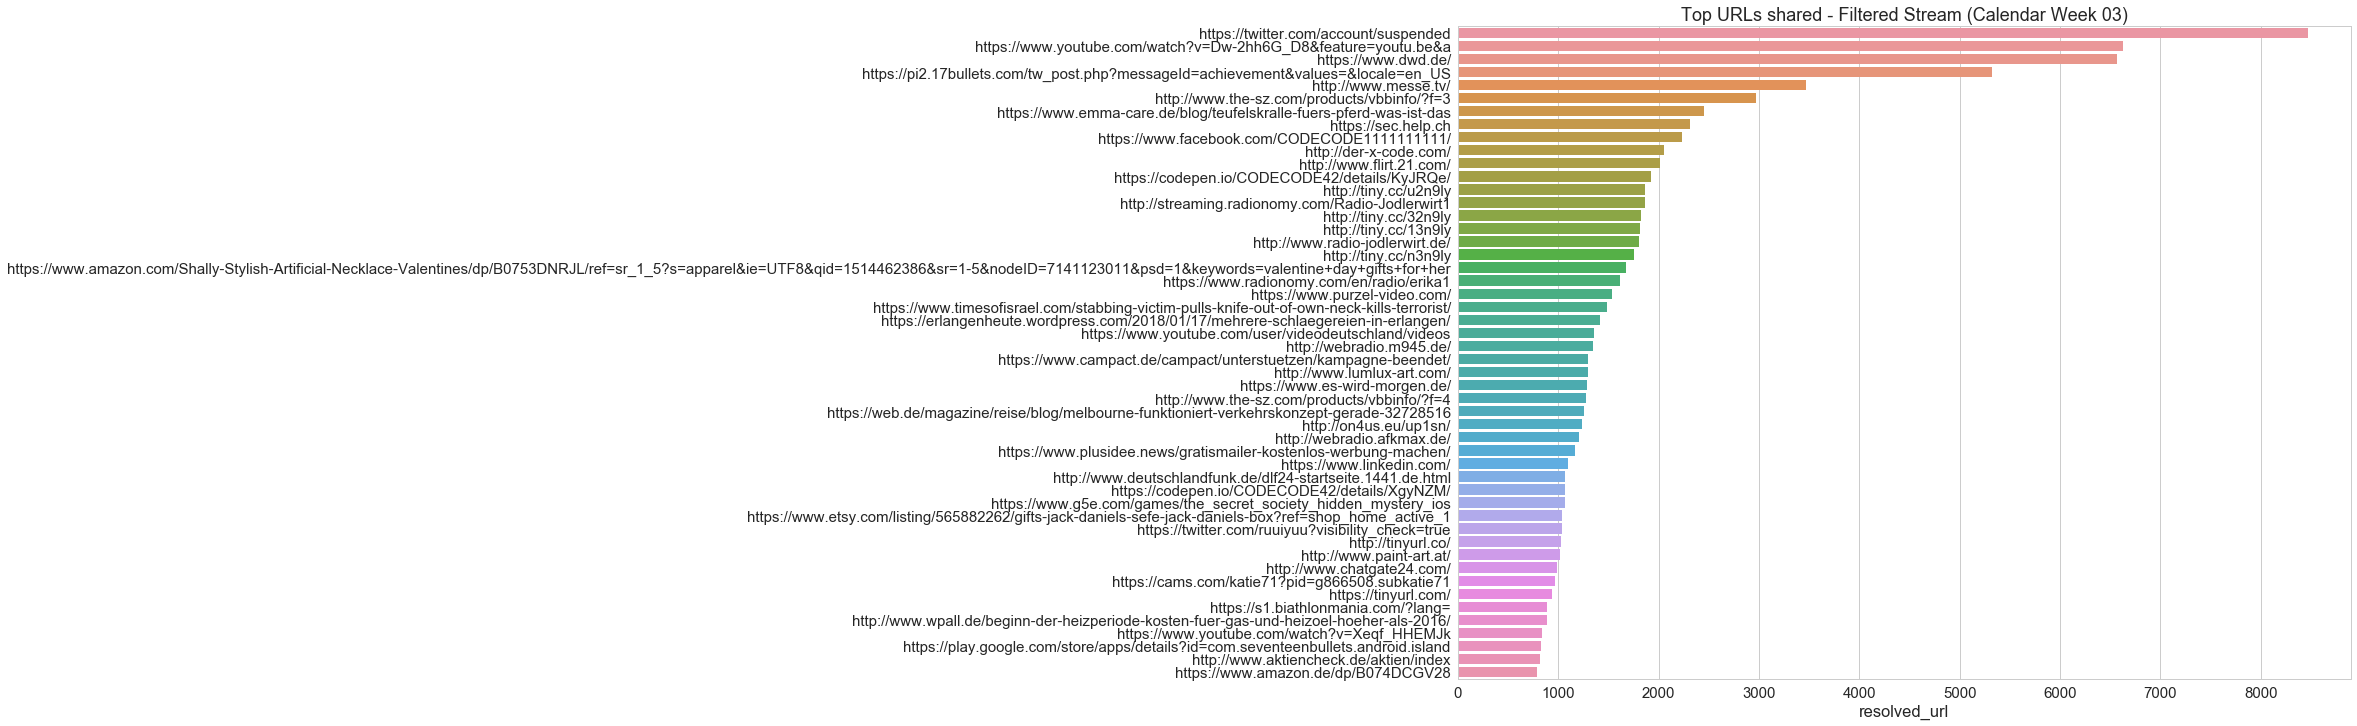

In [7]:
top_urls_03 = tweets03['resolved_url'].value_counts()

plt.figure(figsize=(16,12))

print(top_urls_03[:50])
ax = sns.barplot(y=top_urls_03[:50].index, x=top_urls_03[:50])
ax.set_title("Top URLs shared - Filtered Stream (Calendar Week 03)")

plt.savefig(directory + stream + "/filtered-top-urls-shared-03.png", transparent=True)

https://sec.help.ch                                                                                                  5615
https://pi2.17bullets.com/tw_post.php?messageId=achievement&values=&locale=en_US                                     5088
https://www.ffd365.de                                                                                                4791
https://www.dwd.de/                                                                                                  4566
http://www.gooni168.tv/sellpanties/item/haushalts-sklave-in/                                                         3474
https://www.linkedin.com/                                                                                            2935
http://www.the-sz.com/products/vbbinfo/?f=3                                                                          2739
https://www.miet-check.de/                                                                                           2420
https://mobile.twitter.c

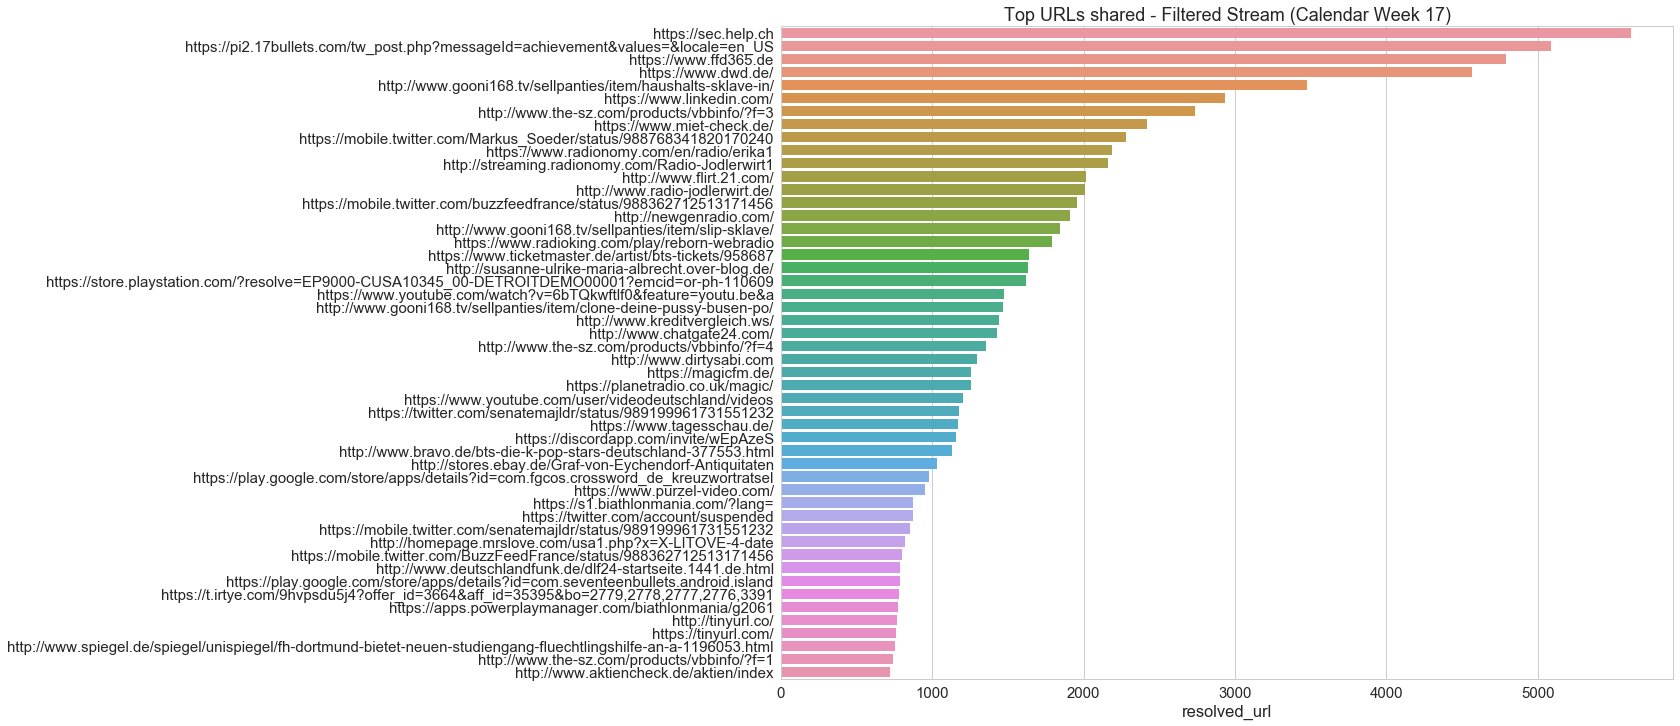

In [8]:
top_urls_17 = tweets17['resolved_url'].value_counts()

plt.figure(figsize=(16,12))

print(top_urls_17[:50])
ax = sns.barplot(y=top_urls_17[:50].index, x=top_urls_17[:50])
ax.set_title("Top URLs shared - Filtered Stream (Calendar Week 17)")

plt.savefig(directory + stream + "/filtered-top-urls-shared-17.png", transparent=True)

twitter.com                 348905
youtube.com                 233498
facebook.com                 65092
instagram.com                39391
google.com                   36688
welt.de                      31993
spiegel.de                   26804
amazon.de                    22972
focus.de                     22507
twitch.tv                    20801
benzinpreis-aktuell.de       20057
miet-check.de                17441
wordpress.com                16512
pressebank.de                16477
ask.fm                       16113
faz.net                      15593
bild.de                      15557
paper.li                     13635
persy.jobs                   11699
sueddeutsche.de              11586
zeit.de                      11412
tagesschau.de                11122
presseportal.de              10976
bestbet4u.com                10675
gutscheinstadt.de            10476
tiny.cc                      10324
heise.de                      9537
ebay.de                       8177
n-tv.de             

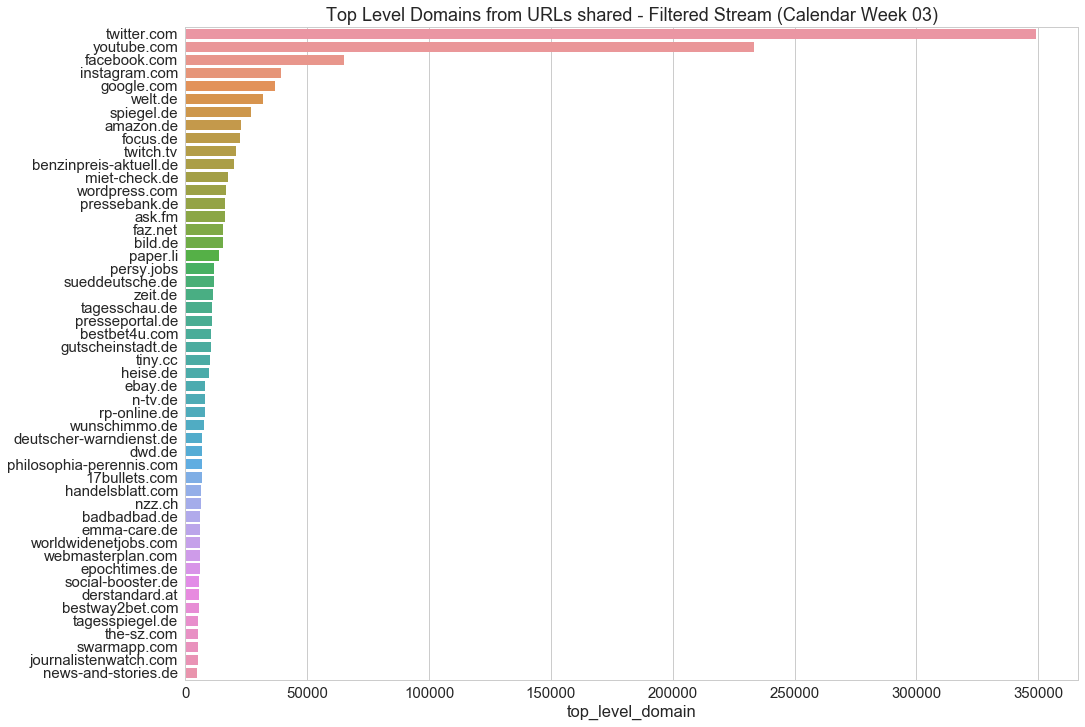

In [9]:
top_urls_03 = tweets03['top_level_domain'].value_counts()

plt.figure(figsize=(16,12))
print(top_urls_03[:50])
ax = sns.barplot(y=top_urls_03[:50].index, x=top_urls_03[:50])
ax.set_title("Top Level Domains from URLs shared - Filtered Stream (Calendar Week 03)")

plt.savefig(directory + stream + "/filtered-top-tld-shared-03.png", transparent=True)

twitter.com              339597
youtube.com              205700
facebook.com              57313
instagram.com             41411
amazon.de                 26290
spiegel.de                24238
welt.de                   22878
twitch.tv                 21044
google.com                19676
focus.de                  15926
paper.li                  14351
wordpress.com             13698
bild.de                   13600
faz.net                   12026
favstar.fm                11400
sueddeutsche.de           10999
tagesschau.de             10529
zeit.de                    9834
presseportal.de            9341
heise.de                   8202
n-tv.de                    7248
rp-online.de               7103
journalistenwatch.com      7059
parapsychologie.club       6815
gooni168.tv                6788
ebay.de                    6704
epochtimes.de              6704
journal.koeln              6630
social-booster.de          6448
wikipedia.org              6348
ffd365.de                  6174
17bullet

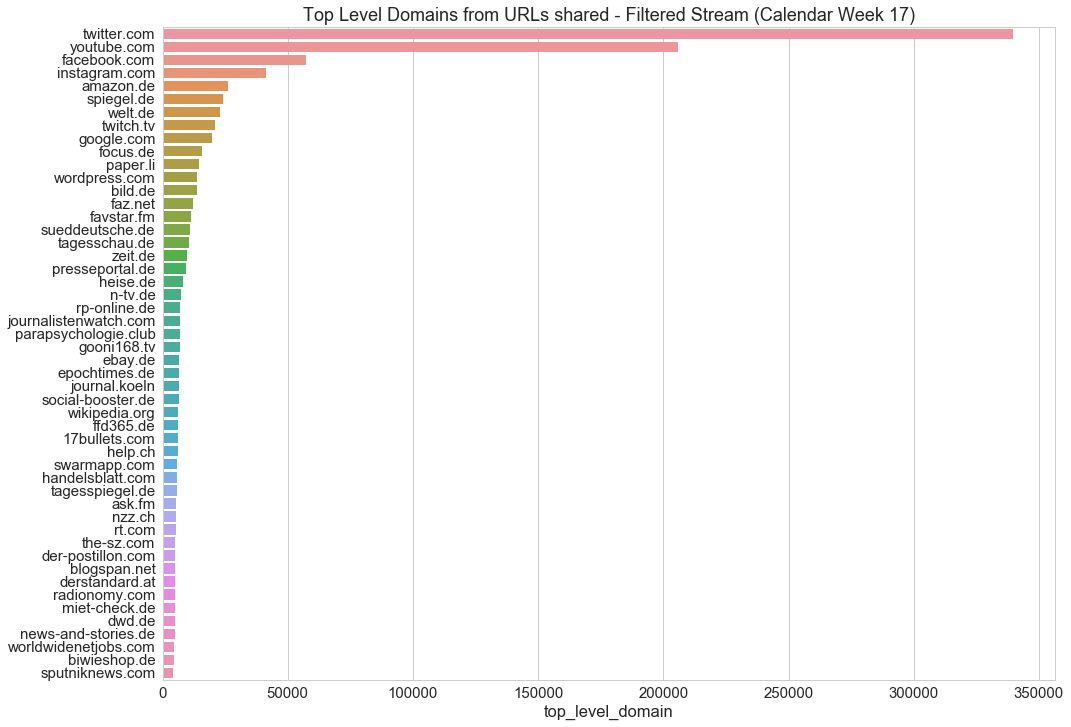

In [10]:
top_urls_17 = tweets17['top_level_domain'].value_counts()

plt.figure(figsize=(16,12))

print(top_urls_17[:50])
ax = sns.barplot(y=top_urls_17[:50].index, x=top_urls_17[:50])
ax.set_title("Top Level Domains from URLs shared - Filtered Stream (Calendar Week 17)")

plt.savefig(directory + stream + "/filtered-top-tld-shared-17.png", transparent=True)

https://twitter.com/                   348274
https://www.youtube.com/               232930
https://www.facebook.com/               57256
https://www.instagram.com/              38839
https://www.welt.de/                    31351
http://www.spiegel.de/                  25663
https://www.amazon.de/                  22804
https://www.focus.de/                   21803
https://www.benzinpreis-aktuell.de/     20057
https://www.twitch.tv/                  19389
https://www.miet-check.de/              17439
https://www.pressebank.de/              16477
https://ask.fm/                         16106
https://news.google.com/                15841
http://www.faz.net/                     14162
https://www.bild.de/                    13560
https://paper.li/                       12937
http://www.sueddeutsche.de/             11263
https://www.presseportal.de/            10976
https://www.zeit.de/                    10743
http://www.bestbet4u.com/               10675
https://gutscheinstadt.de/        

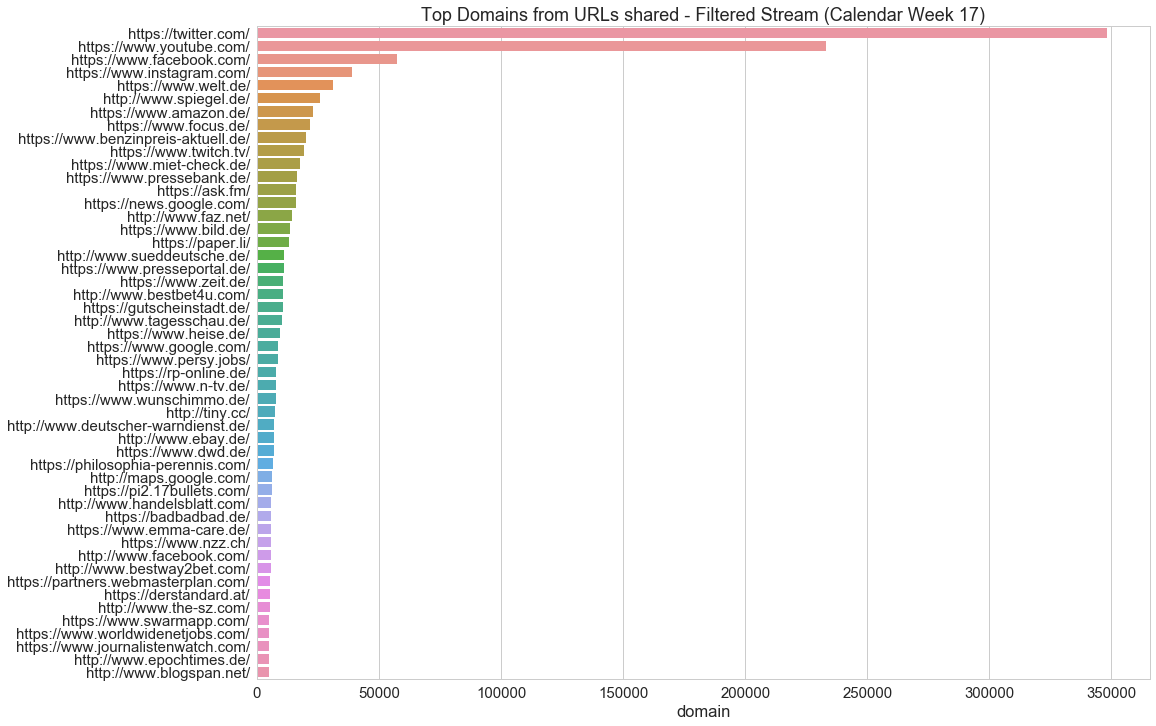

In [11]:
top_urls_03 = tweets03['domain'].value_counts()

plt.figure(figsize=(16,12))

print(top_urls_03[:50])
ax = sns.barplot(y=top_urls_03[:50].index, x=top_urls_03[:50])
ax.set_title("Top Domains from URLs shared - Filtered Stream (Calendar Week 17)")

plt.savefig(directory + stream + "/filtered-top-domains-shared-17.png", transparent=True)

https://www.youtube.com/              205277
https://mobile.twitter.com/           204412
https://twitter.com/                  135010
https://www.facebook.com/              54358
https://www.instagram.com/             41037
https://www.amazon.de/                 26177
http://www.spiegel.de/                 23134
https://www.welt.de/                   22252
https://www.twitch.tv/                 19911
https://www.focus.de/                  15266
https://paper.li/                      13504
https://www.bild.de/                   11533
http://www.faz.net/                    10968
http://de.favstar.fm/                  10694
http://www.sueddeutsche.de/            10304
https://www.zeit.de/                    9413
https://www.presseportal.de/            9341
https://news.google.com/                8958
http://www.tagesschau.de/               8067
https://www.heise.de/                   8053
https://rp-online.de/                   7091
https://www.journalistenwatch.com/      7058
https://ww

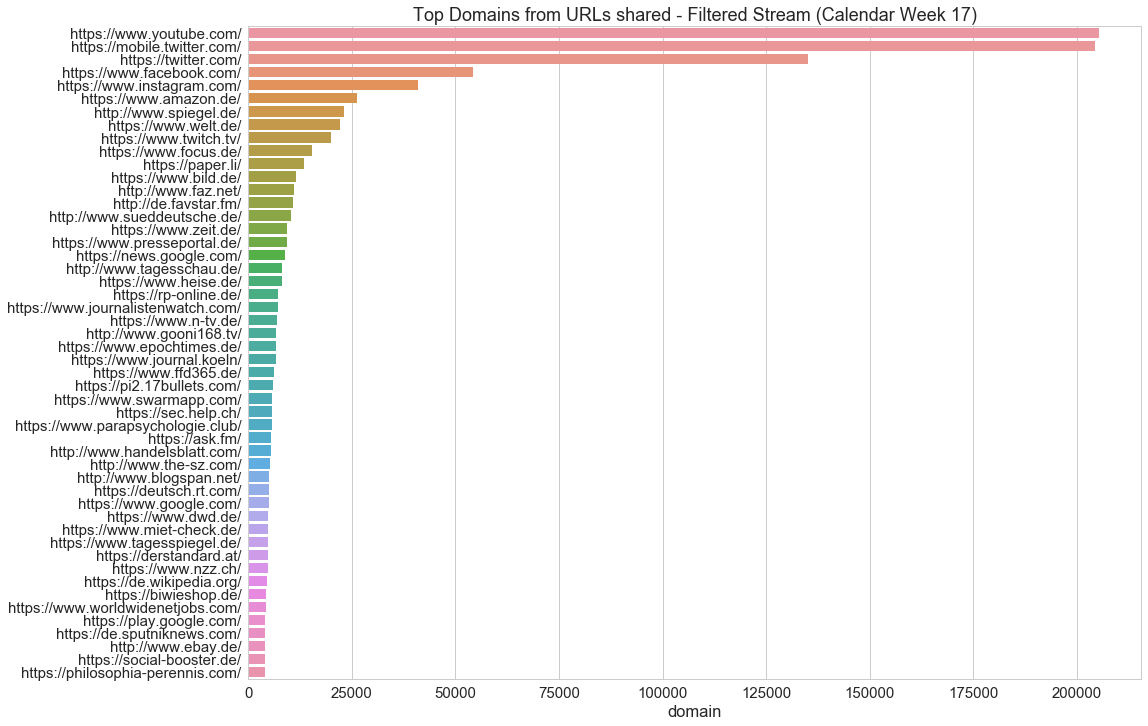

In [12]:
top_urls_17 = tweets17['domain'].value_counts()

plt.figure(figsize=(16,12))

print(top_urls_17[:50])
ax = sns.barplot(y=top_urls_17[:50].index, x=top_urls_17[:50])
ax.set_title("Top Domains from URLs shared - Filtered Stream (Calendar Week 17)")

plt.savefig(directory + stream + "/filtered-top-domains-shared-17.png", transparent=True)